## GDP - Life Expectancy Portfolio Project


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from google.colab import files
data_to_load = files.upload()
import io
gdp_life_exp = pd.read_csv(io.BytesIO(data_to_load['all_data.csv']))

Saving all_data.csv to all_data.csv


In [ ]:
#Explore Data Frame
print(gdp_life_exp.head(10))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11


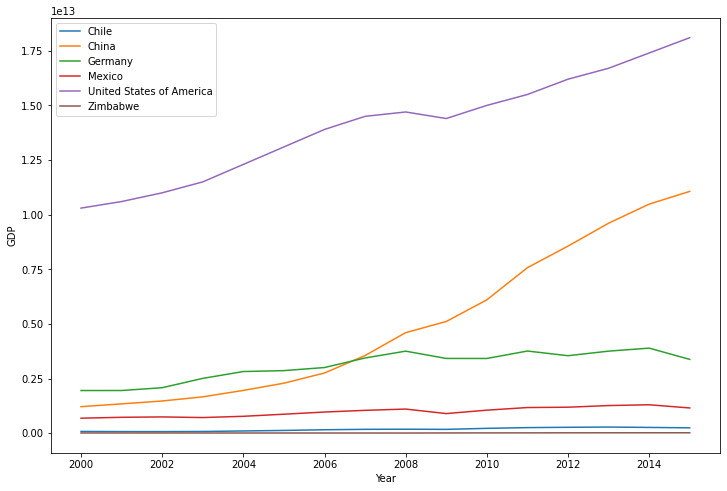

In [ ]:
#We'll see how the GDP by country has changed over time
fig = plt.figure(figsize=(12,8))
ax = sns.lineplot(x='Year', y='GDP', hue='Country',data=gdp_life_exp)
plt.legend(loc='upper left')
plt.show()

After plotting  each countrys GDP overtime, we can see how Chinas GDP at a glance, has had the biggest upward slope, starting in 2006. We can also see USAs GDP is the largest from all countries analized. Other than taht, the GPD of the rest of the countries has been relatively flat.

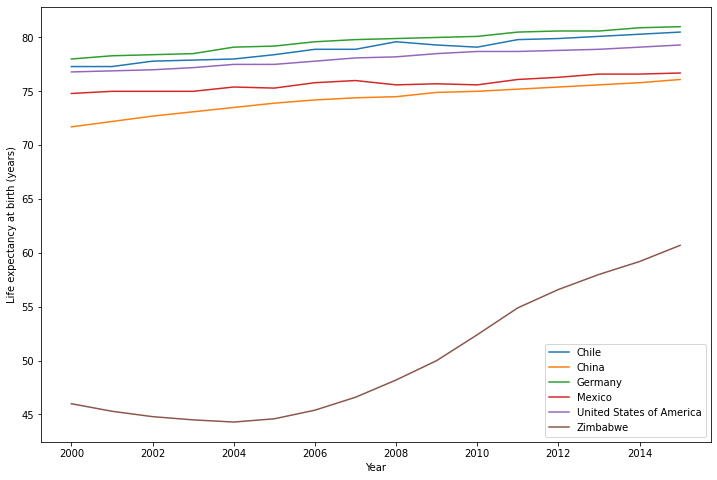

In [ ]:
##We'll see how life expectancy by country has changed over time
fig = plt.figure(figsize=(12,8))
ax = sns.lineplot(x='Year', y='Life expectancy at birth (years)', hue='Country',data=gdp_life_exp)
plt.legend(loc='lower right')
plt.show()

After plotting Life expecancy of each country, we can see a small upward trend, and a big improvement in zimbabwe since 2005, wich had a downward slope until then.

                    Country  GDP_per_country
0                     Chile         0.003297
1                     China         0.132428
2                   Germany         0.049152
3                    Mexico         0.016404
4  United States of America         0.219821
5                  Zimbabwe         0.000201
6                    Others         0.578697


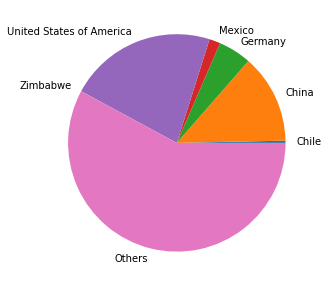

In [ ]:
#Now, we´ll analyze how much each country contributes to the global GDP
gdp_2014 = gdp_life_exp[gdp_life_exp.Year == 2014]
gdp_2014 = gdp_2014.reset_index()
gdp_2014 = gdp_2014.drop(columns = 'index')
#print(gdp_2014.head(10))

world_gdp_2014 = 79155310000000

percentage_per_gdp = pd.DataFrame()
percentage_per_gdp['Country'] = gdp_2014.Country
percentage_per_gdp['GDP_per_country'] = gdp_2014.GDP/world_gdp_2014

#print(percentage_per_gdp)

total_gdp_sample = 0
for gdp in percentage_per_gdp.GDP_per_country:
  total_gdp_sample += gdp

#print(total_gdp_sample)
total_gdp_others = 1- total_gdp_sample

percentage_per_gdp = percentage_per_gdp.append({'Country': 'Others', 'GDP_per_country': total_gdp_others}, ignore_index = True)

print(percentage_per_gdp)

fig = plt.figure(figsize=(5,5))
ax = plt.pie(percentage_per_gdp['GDP_per_country'], labels= percentage_per_gdp.Country)

plt.show()

                    Country  Life expectancy at birth (years)           GDP
0                     Chile                          78.94375  1.697888e+11
1                     China                          74.26250  4.957714e+12
2                   Germany                          79.65625  3.094776e+12
3                    Mexico                          75.71875  9.766506e+11
4  United States of America                          78.06250  1.407500e+13
5                  Zimbabwe                          50.09375  9.062580e+09


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


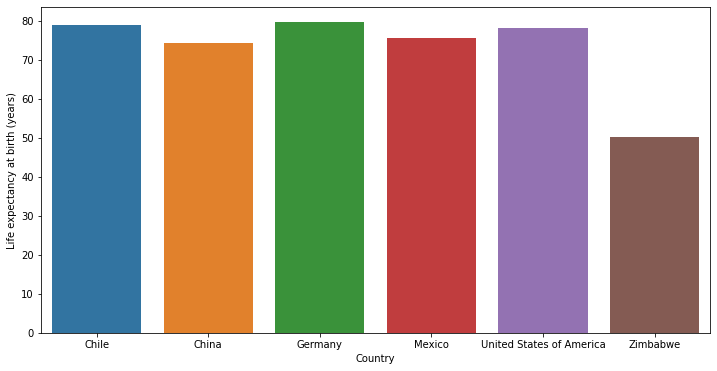

In [ ]:
#Life expectancy average by country.

gdp_life_exp_avg = pd.DataFrame()
gdp_life_exp_avg= gdp_life_exp.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(gdp_life_exp_avg)

fig = plt.figure(figsize=(12,6))
ax = sns.barplot(gdp_life_exp_avg['Country'], gdp_life_exp_avg['Life expectancy at birth (years)'])
plt.show()

                    Country  Life expectancy at birth (years)           GDP
0                     Chile                          78.94375  1.697888e+11
1                     China                          74.26250  4.957714e+12
2                   Germany                          79.65625  3.094776e+12
3                    Mexico                          75.71875  9.766506e+11
4  United States of America                          78.06250  1.407500e+13
5                  Zimbabwe                          50.09375  9.062580e+09


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


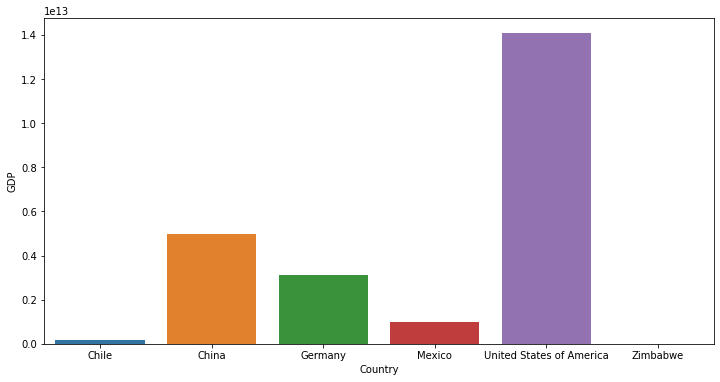

In [ ]:
#GDP average by country.

gdp_life_exp_avg = pd.DataFrame()
gdp_life_exp_avg= gdp_life_exp.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(gdp_life_exp_avg)

fig = plt.figure(figsize=(12,6))
ax = sns.barplot(gdp_life_exp_avg['Country'], gdp_life_exp_avg['GDP'])
plt.show()

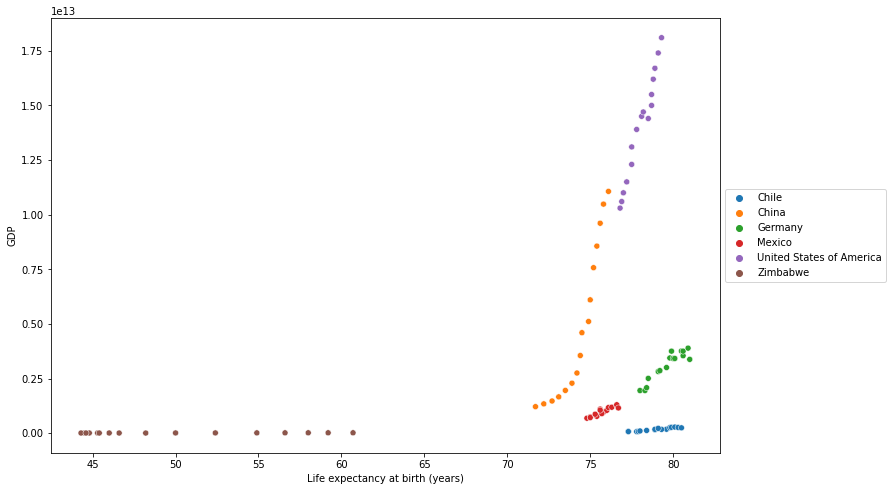

In [ ]:
#Relation between Life expectancy and GDP
fig = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=gdp_life_exp['Life expectancy at birth (years)'], y=gdp_life_exp['GDP'], hue=gdp_life_exp['Country']).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

Other than Zimbabwe, we can see that even tho GPD and Life Expectancy both have an upward trend, GDP grows at a much higher rate.